# Practical No: 3

### Write a program to perform Log transformation,Power-law transformations and Piecewise linear transformations.

----------------------

### Log Transformation

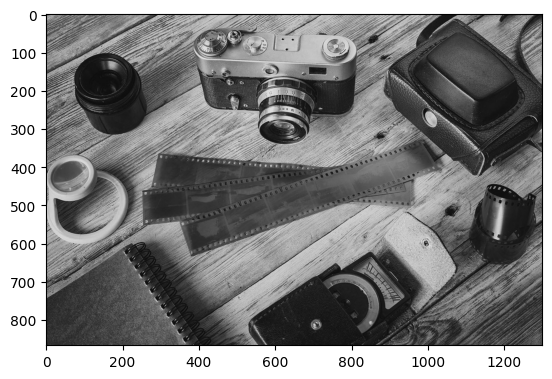

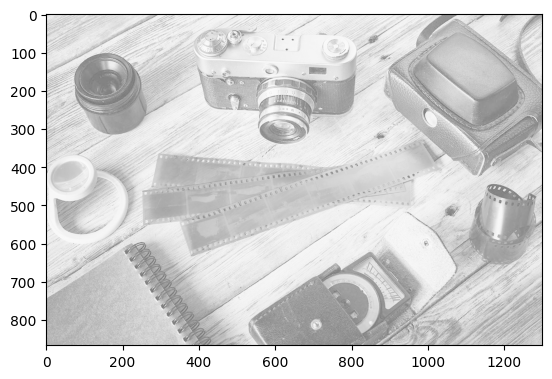

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the image.
img = cv2.imread('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/sample.jpg')
  
# Apply log transform.
c = 255/(np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)
  
# Specify the data type.
log_transformed = np.array(log_transformed, dtype = np.uint8)
  
# Save the output.
cv2.imwrite('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/log_transformed.jpg', log_transformed)

plt.imshow(img)
plt.show()
plt.imshow(log_transformed)
plt.show()

----------------------------------------------

### Power-Law (Gamma) Transformation

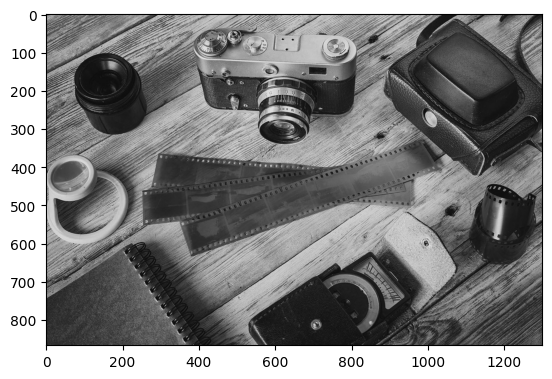

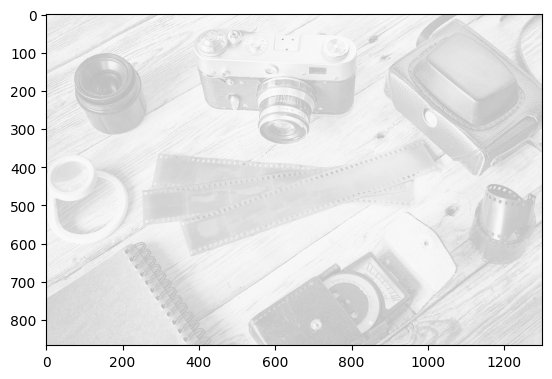

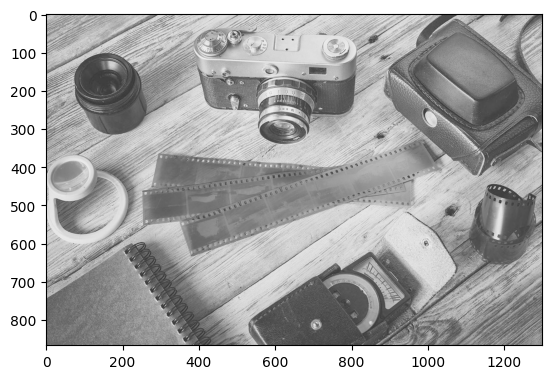

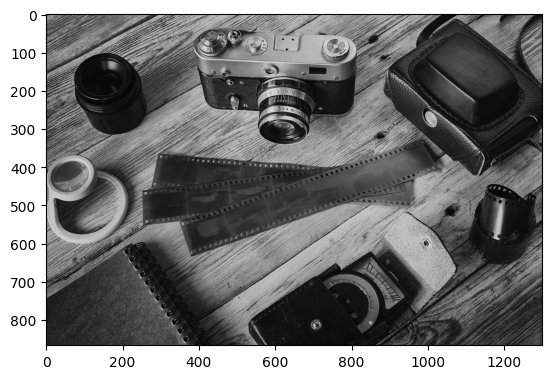

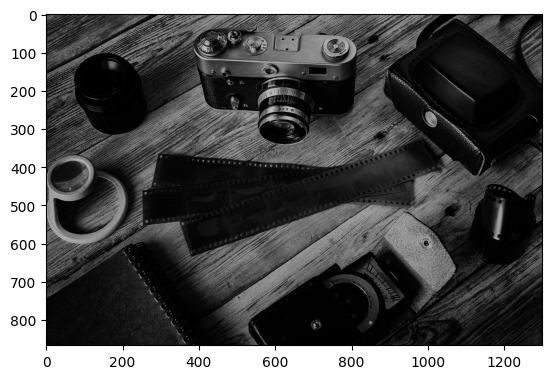

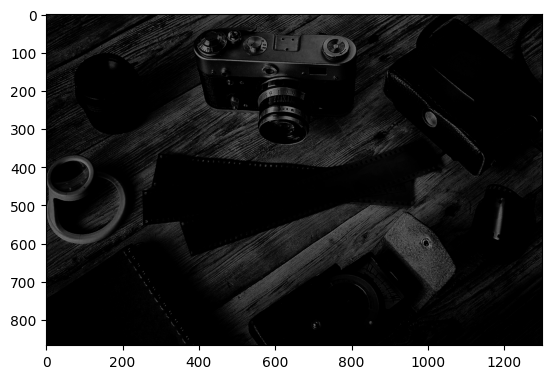

In [2]:
import cv2
import numpy as np
  
# Open the image.
img = cv2.imread('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/sample.jpg')
plt.imshow(img)
plt.show()
# Trying 4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2,5]:
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  
    # Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)
    plt.imshow(gamma_corrected)
    plt.show()

----------------------------------------------

### Piecewise-Linear Transformation Functions

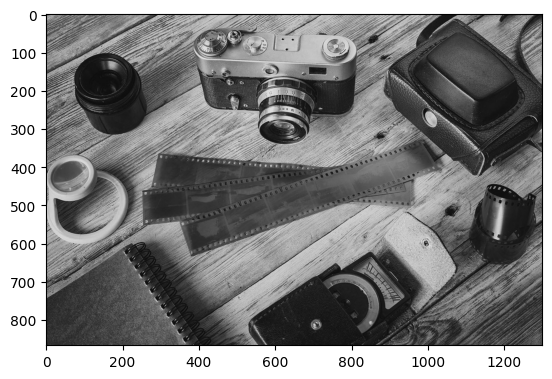

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


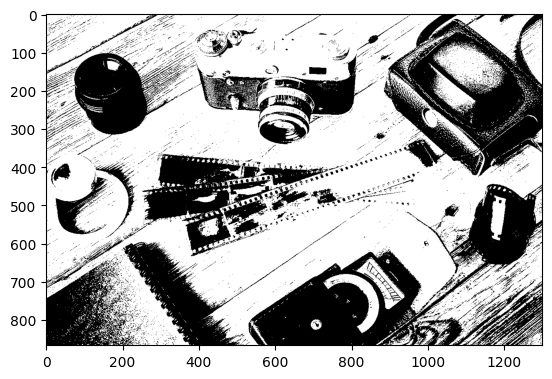

In [3]:
import cv2
import numpy as np
  
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
  
# Open the image.
img = cv2.imread('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/sample.jpg')
plt.imshow(img)
plt.show()
# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
  
# Save edited image.
cv2.imwrite('F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/ImageProcessing/Dataset/contrast_stretch.jpg', contrast_stretched)

plt.imshow(contrast_stretched)
plt.show()